<a href="https://colab.research.google.com/github/lauxpaux/HappinessResearch/blob/main/HappinessDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What makes a country happy? 

For this project, I will be using the World Happiness Report 2022 dataset collected from kaggle found [here](https://www.kaggle.com/datasets/mathurinache/world-happiness-report) to showcase determinants of happiness around the globe. 



### Assumptions before looking at the data


As a starting point, I'm going to list my biased assumptions prior to looking at the raw data by formulating a series of hypothesis to test. The reason for this being is to avoid as much as possible to manipulate the research to my assumptions rather than analyzing the data as well as to assess interesting discoveries that help me formulate my research problem better.

**Personal (biased) assumptions:**
1.   Economy is a strongest determinant of happiness
2.   Freedom is a close second determinant of happiness
3.Social support is a strong determinant of happiness



**Curiorisites before primal data investigation:**
1. Is there correlation between health and happiness? 
2. What is the correlation between health and government trust/corruption?  
4. What is the correlation between family/social support and life expectancy? 
5. What is the correlation between social support and economy? 
6. How does generosity affect health? 
8. What is the strongest determinants of happiness and the least? 

### Impressions after peeping at the data 👀






Listing assumptions after investigating the raw data, particularly the top 3 happiest nations and top 3 unhappiest nations.

1. It turns out, the top 3 nations do not have the highest GDP and the unhappiest nations do not have the lowest GDP.
2. The top nations report some of the highest satisfaction as far as freedom, the unhappiest nations report considerably lower satisfaction in freedom, with Afghanistan (the unhappiest) having the lowest scores.

3. The top happiest nations report some of the highest social support however the unhappiest nations do not report the lowest scores in social support.  What exactly does social support mean and is it worth investigating? 

At this point it is important to establish that I still do not have my research question as nothing in particular has sparked my concrete interest. One of the the most important parts of this exploration process is to pose a simple straightforward rewarding question that will derive focus and aid in selecting and producing a machine learning model. 

### Finally let's begin! 

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pylab as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Happiness Dataset/2022.csv')
#looking into the top 5 happinest nations
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
#looking at the 5 unhappiest nations 
df.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
print()
print('Shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [5]:
df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,147.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,74.000000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.579338,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.500000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,74.000000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,110.500000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,147.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [6]:
df.nunique(axis=0)

RANK                                          147
Country                                       147
Happiness score                               141
Whisker-high                                  144
Whisker-low                                   141
Dystopia (1.83) + residual                    138
Explained by: GDP per capita                  141
Explained by: Social support                  133
Explained by: Healthy life expectancy         134
Explained by: Freedom to make life choices    128
Explained by: Generosity                      116
Explained by: Perceptions of corruption       116
dtype: int64

## Data Cleaning



Let's get rid of redundant columns. For our exploration, we don't need to know the numeric rank of each country, the whisker-high or whisker-low scores and 'Dystopia (1.83) + residual' is no use to me in this moment. 

In [7]:
df = (df.copy()
      .drop(['RANK', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual'], axis=1)
      .dropna(axis=0)
      )
df

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
141,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


Our columns have longer names than we would like so let's rename them:

In [8]:
cleaned_df = df.rename(columns={'Country':'Country','Happiness score':'Happiness score', 'Explained by: GDP per capita':'GDP', 'Explained by: Social support':'Social support', 
                    'Explained by: Healthy life expectancy':'Life expectancy', 'Explained by: Freedom to make life choices':'Freedom to make life choices',
                    'Explained by: Generosity':'Generosity', 'Explained by: Perceptions of corruption':'Perceptions of corruption'})

In [9]:
country_names = {
    "Luxembourg*": "Luxembourg", 
    "Guatemala*": "Guatemala",
    "Kuwait*": "Kuwait",
    "Belarus*": "Belarus",
    "Turkmenistan*": "Turkmenistan",
    "North Cyprus*": "North Cyprus",
    "Libya*": "Libya",
    "Azerbaijan*": "Azerbaijan",
    "Gambia*": "Gambia",
    "Liberia*": "Liberia",
    "Niger*": "Niger",
    "Comoros*": "Comoros",
    "Palestinian Territories*": "Palestinian Territories",
    "Eswatini, Kingdom of*": "Eswatini, Kingdom of",
    "Madagascar*": "Madagascar",
    "Chad*": "Chad",
    "Yemen*": "Yemen",
    "Mauritania*": "Mauritania",
    "Lesotho*": "Lesotho",
    "Botswana*": "Botswana",
    "Rwanda*": "Rwanda",
    }

cleaned_df['Country'] = cleaned_df['Country'].replace(country_names)
cleaned_df

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
141,Botswana,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


Now we have a more straightforward dataframe without the long columns names which will help us visually as we change/plot values 

## Visualizing Data

In [10]:
IMG_PATH = Path() /'images'/'happiness_project'
IMG_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMG_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Variable selection

We have some categorical and numeric values so we will use variable 'cols' to isolate numeric values from our dataframe 

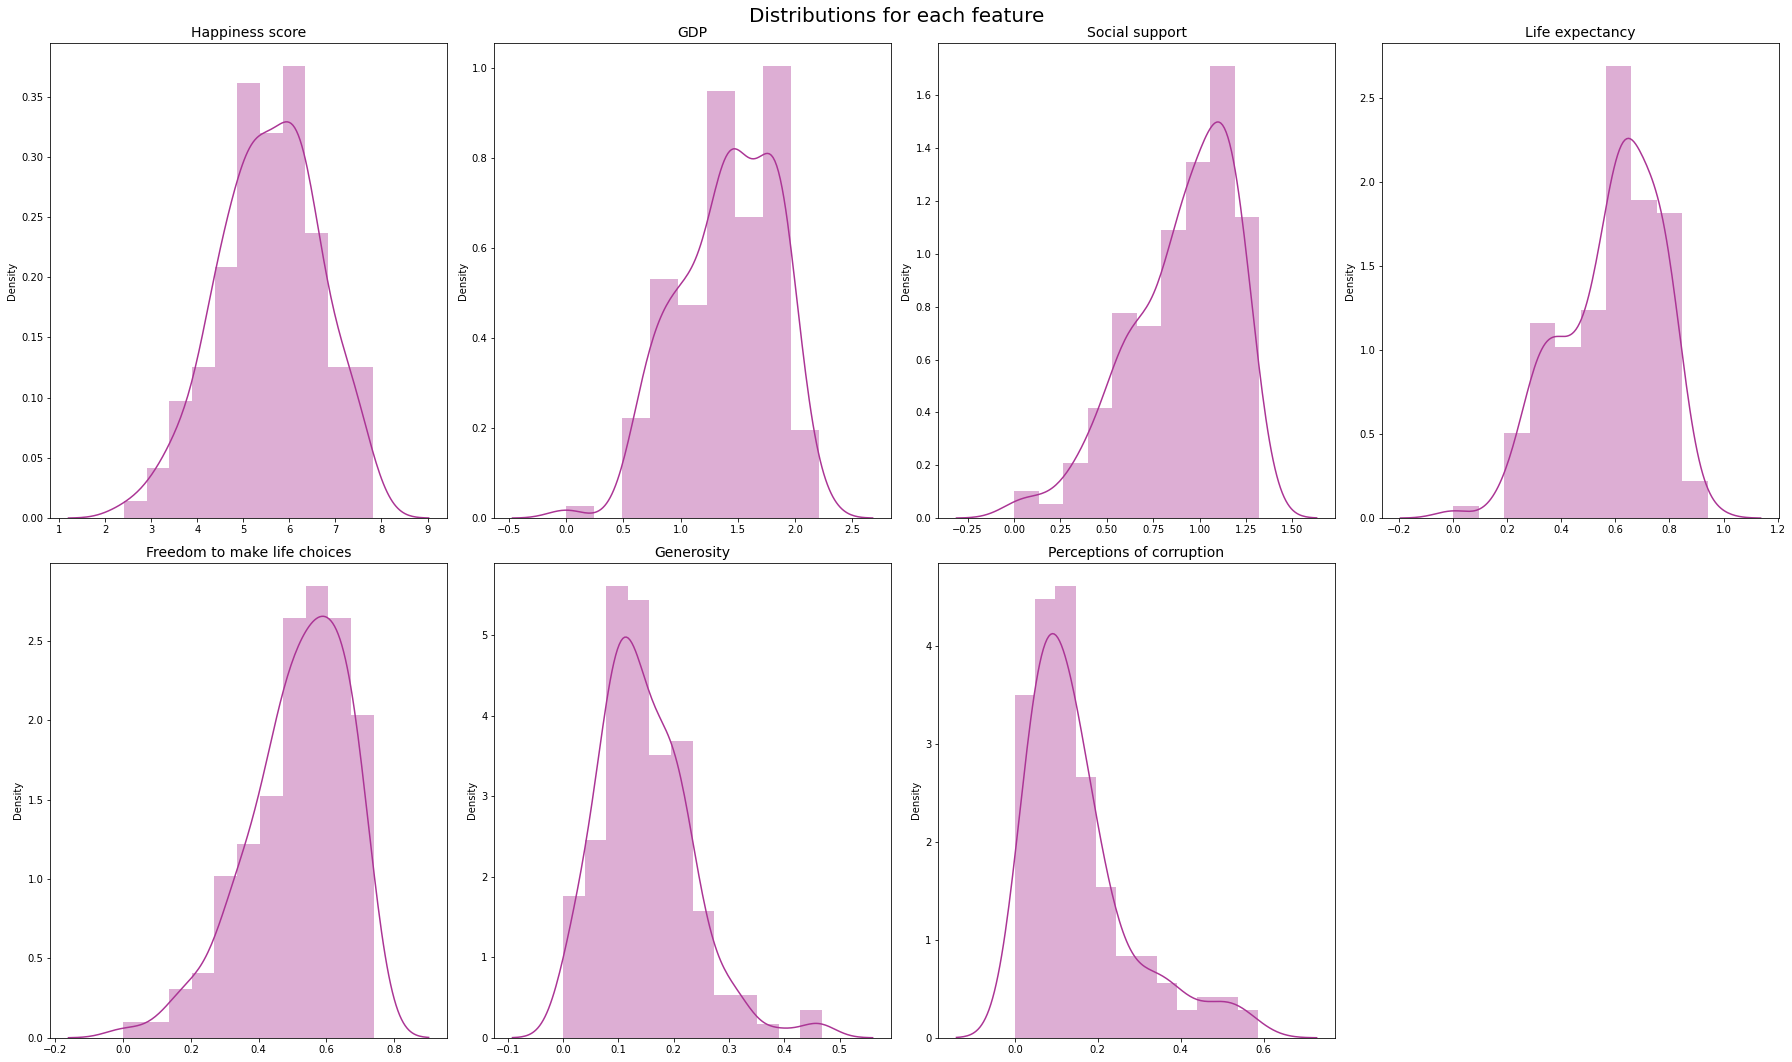

In [11]:
cols = ['Happiness score', 'GDP', 'Social support', 'Life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ]

plt.figure(figsize=(25, 15))
plt.suptitle('Distributions for each feature', fontsize=20)
plt.subplots_adjust(top=0.93, wspace=0.5)

for i in range(len(cols)):
  plt.subplot(2, 4, i+1)
  sns.distplot(x=cleaned_df[cols[i]], color='#AB3595')
  variable = cols[i]
  plt.title(variable, fontsize=14)
  save_fig('Features Distributions')
plt.show();




Standard deviations for each feature: 

In [12]:
for i in range(len(cols)):
  print(cols[i] + ': ' + '\n', cleaned_df[cols[i]].std(), '\n')

Happiness score: 
 1.086842607236694 

GDP: 
 0.4216631116608076 

Social support: 
 0.28012154086585683 

Life expectancy: 
 0.1763363306626657 

Freedom to make life choices: 
 0.14585873045154746 

Generosity: 
 0.08279872899332319 

Perceptions of corruption: 
 0.1275143531150681 



Describe the distributions

---



---



Exploring the correlation between all of the variables

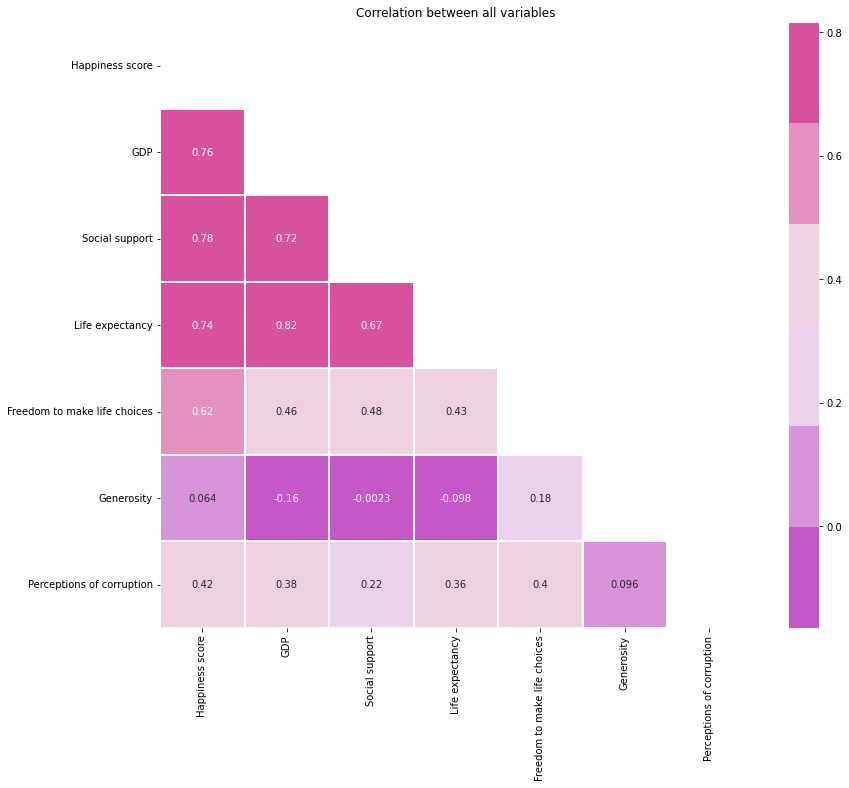

In [13]:
corr = cleaned_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
save_fig('Happiness-correlations')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(306, 340, 67, 55, n=6),
            mask=mask, cbar=True, linecolor='white',  linewidths=2).set(title="Correlation between all variables");





The heatmap aboved demonstrates that the strongest correlations with happiness scores are social support, GDP per capita, and healthy life expectancy. Furthermore, GDP per capita is strongly correlated with social support, along with healthy life expectancy, the strongest relationship across all variables. 

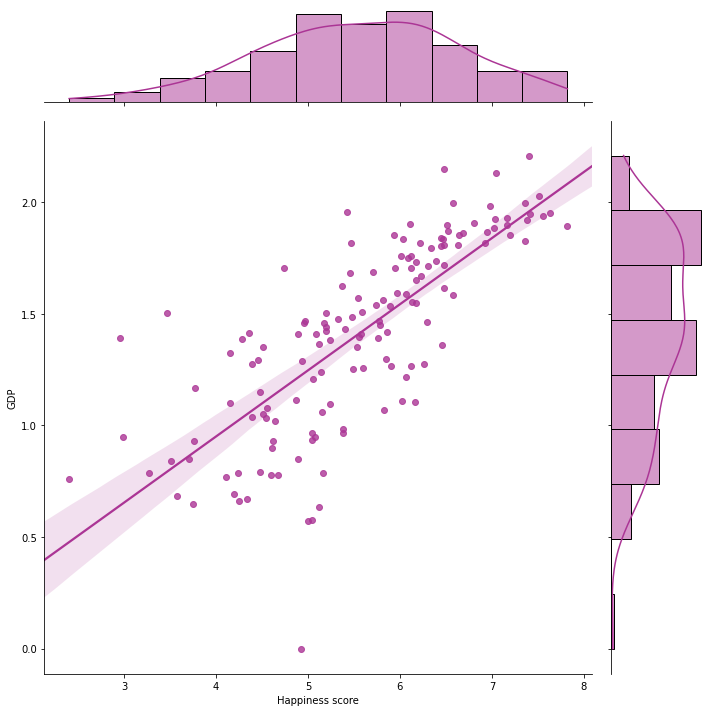

In [14]:
g = sns.jointplot(x="Happiness score", y="GDP", data=cleaned_df,
                  kind="reg", height=10, truncate=False, color='#AB3595'
)


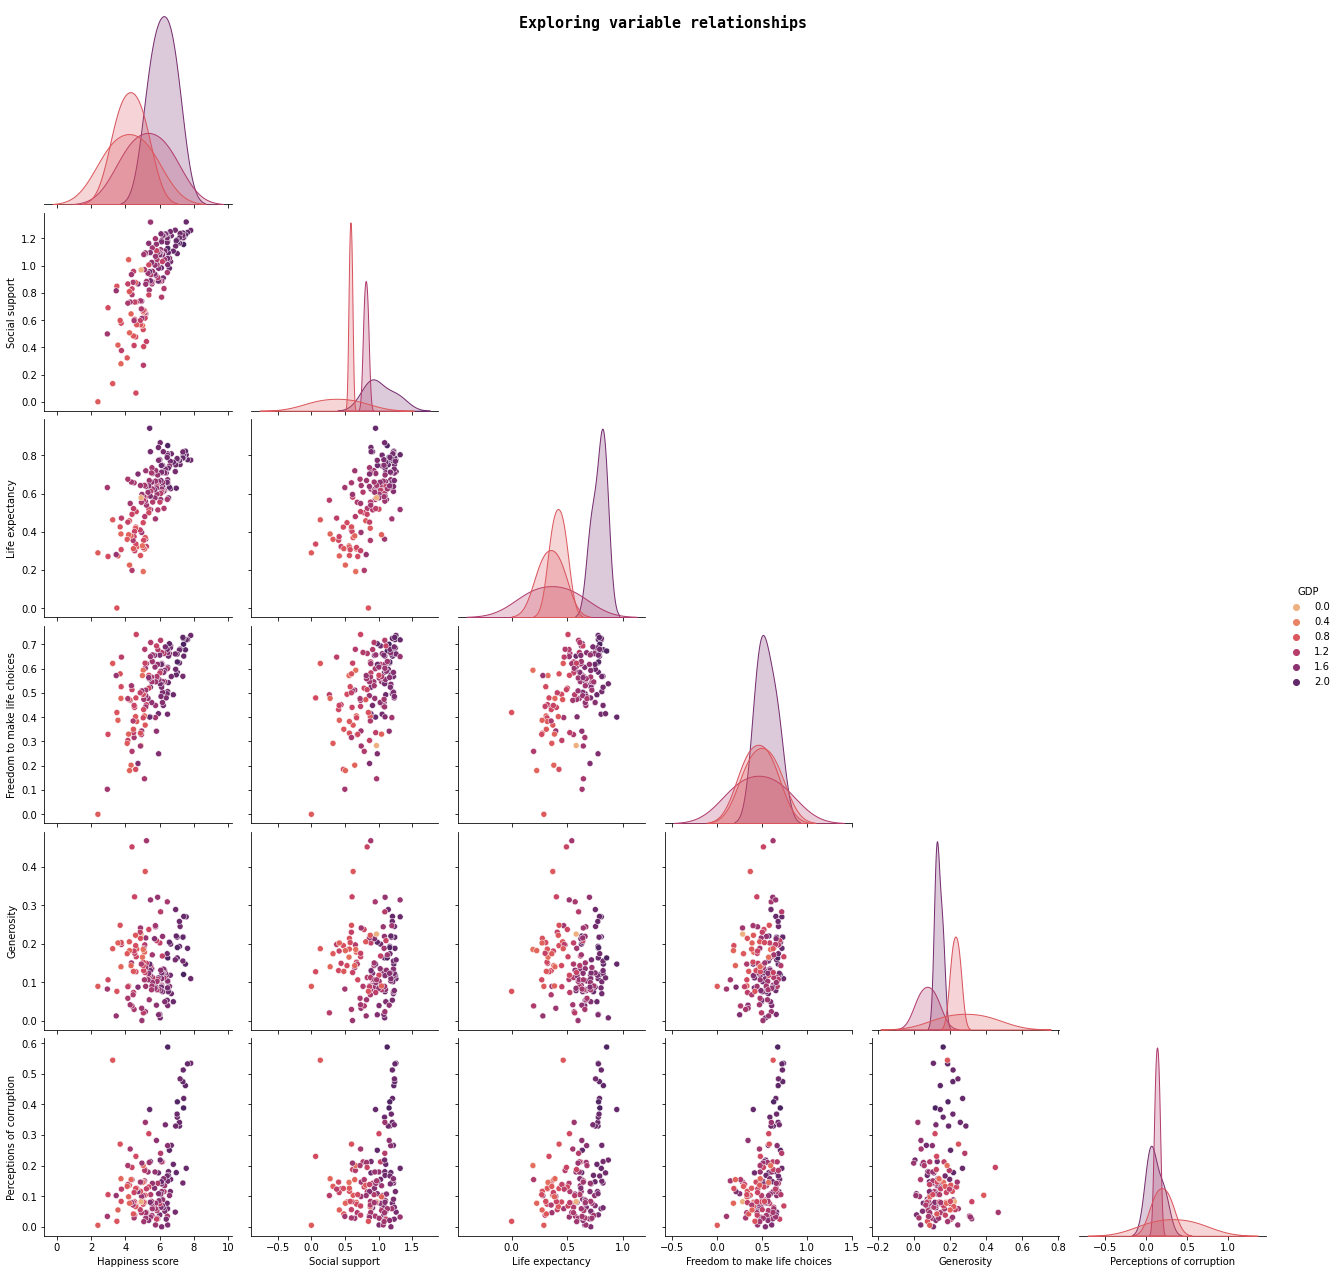

In [15]:
pplot = sns.pairplot(cleaned_df, hue='GDP', height=3, palette="flare", corner=True)
pplot.fig.suptitle('Exploring variable relationships', fontfamily='monospace', fontsize= '15', fontweight= 'bold');

## Let's visualize the happiness spectrum

True


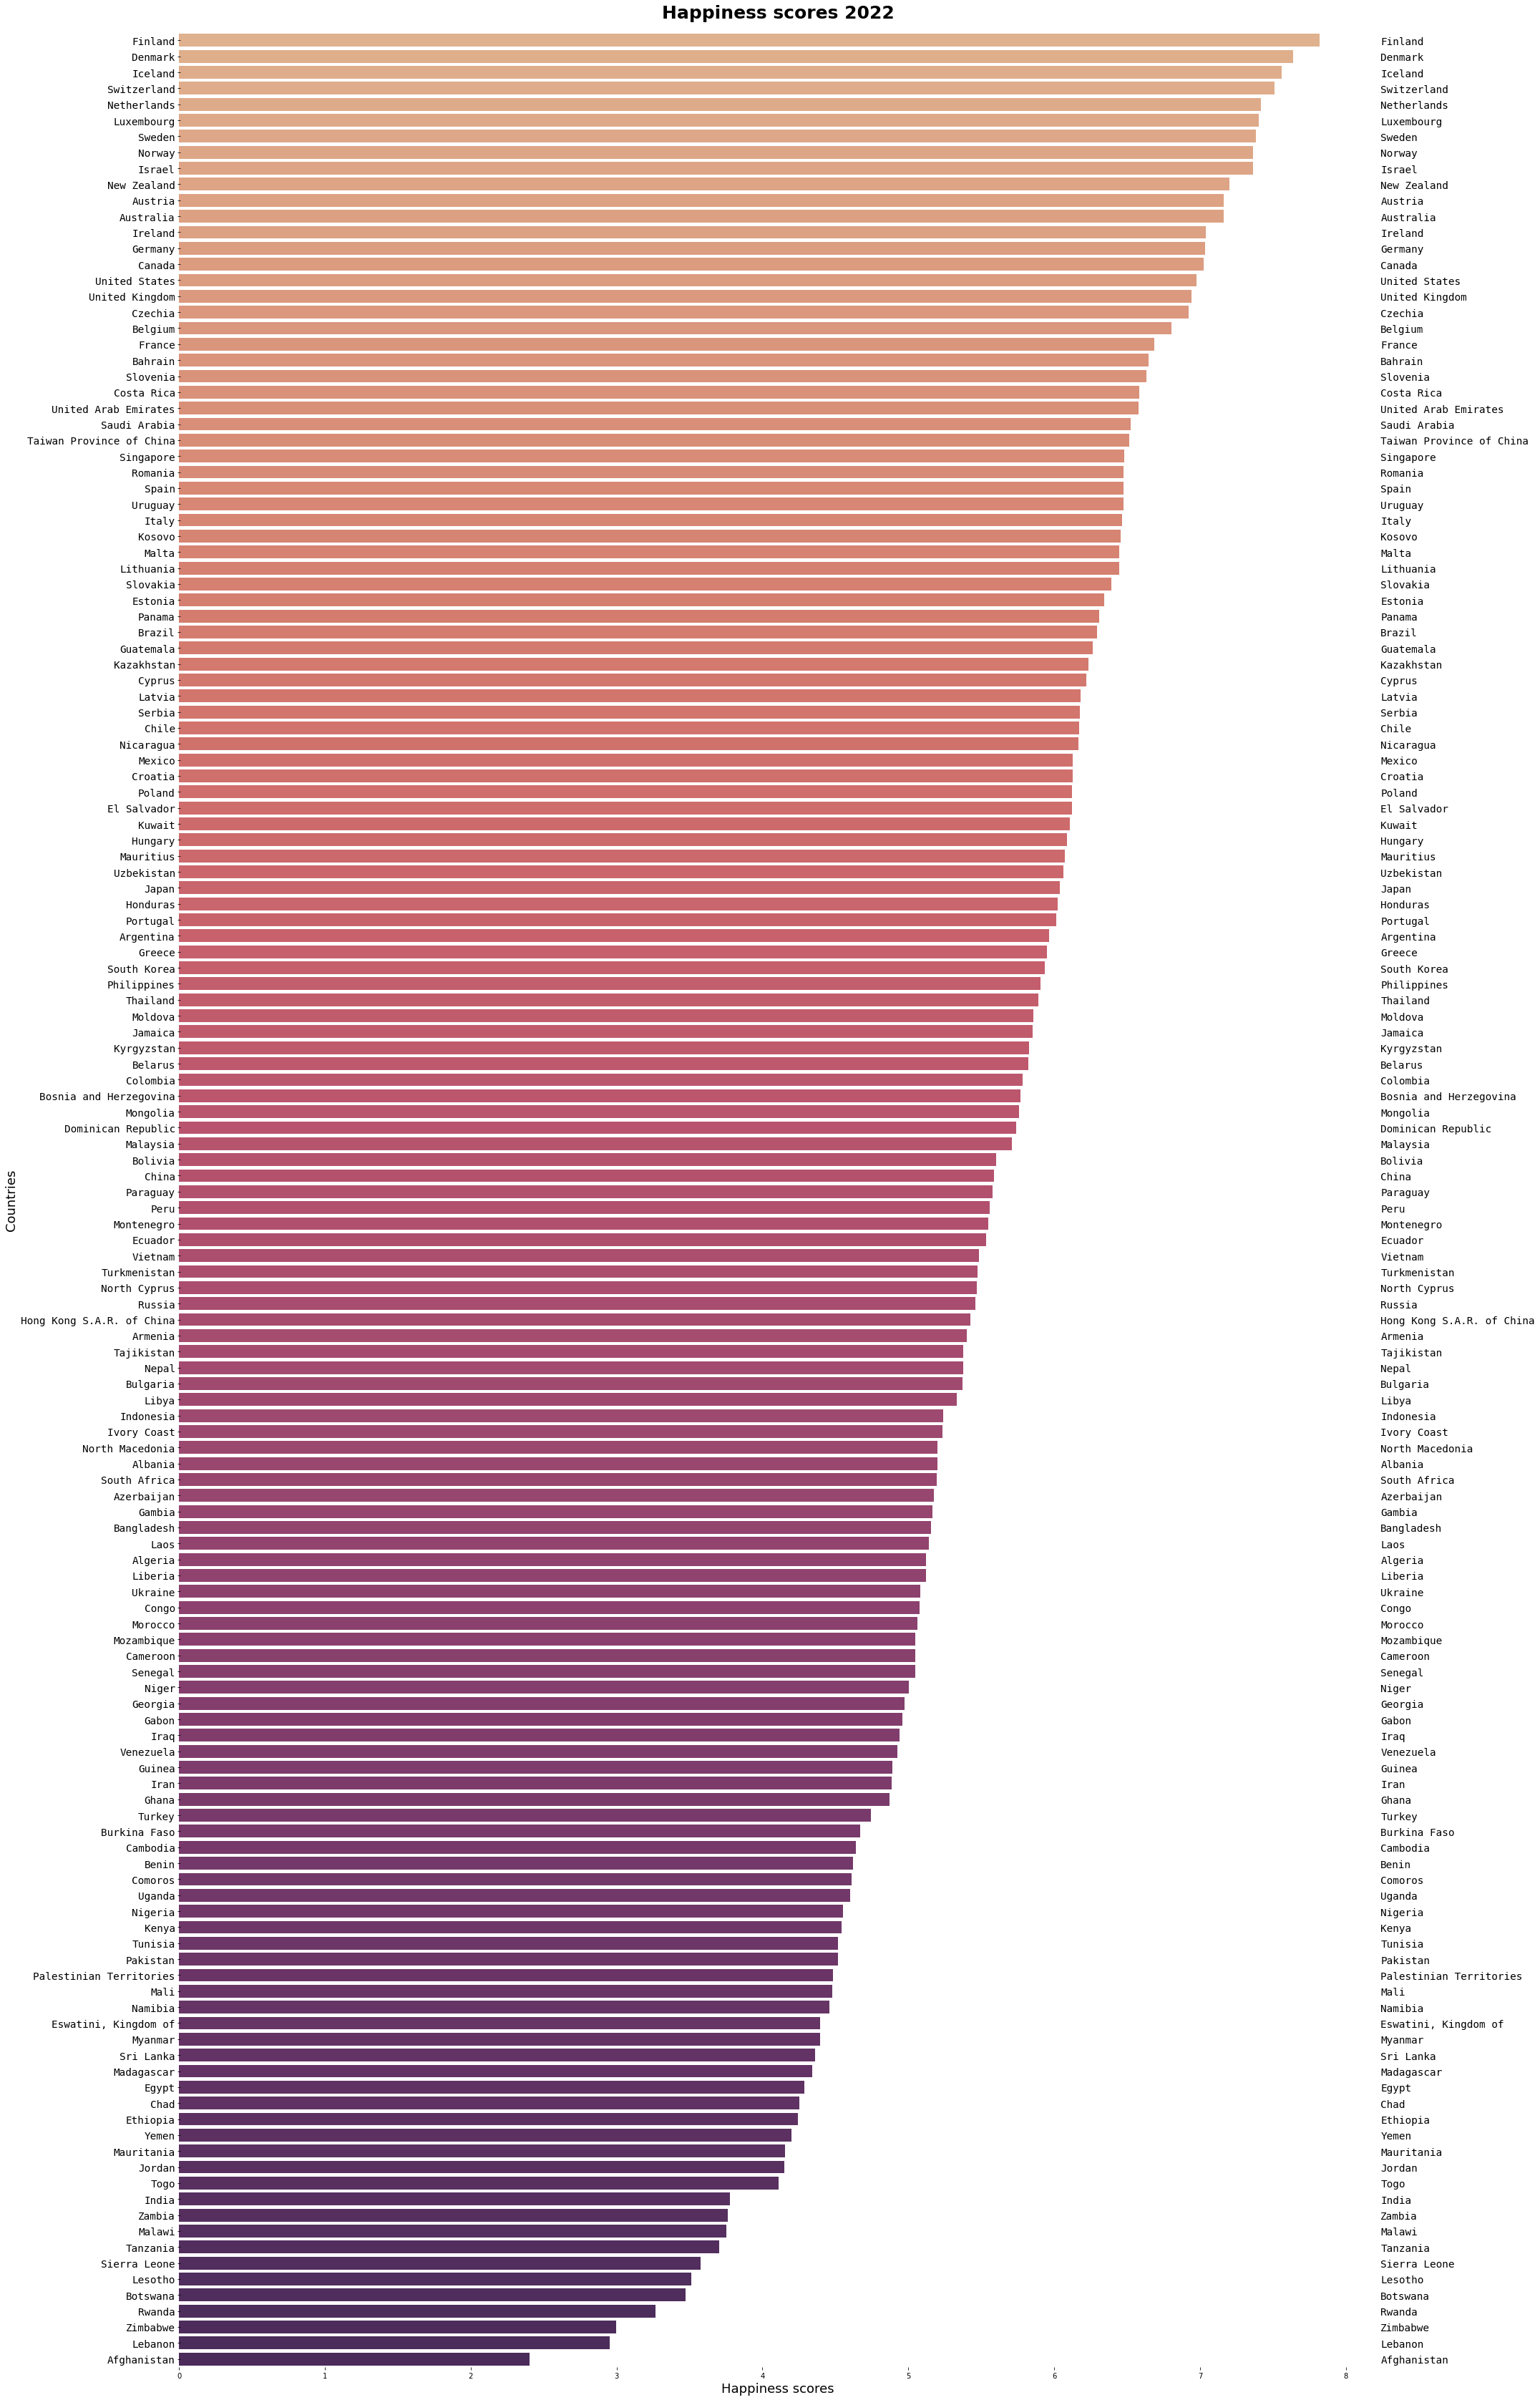

In [16]:
#setting plot styles
bodyFont = {
    'fontfamily': 'monospace',
    'fontsize': '22',
    'fontweight': 'demi',
    'picker': True
}

titleFont = {
    'fontfamily': 'sans-serif',
    'fontsize': '25',
    'fontweight': 'bold',
    'picker': True
}


fig = plt.figure(figsize=(30, 60))
sns.barplot(data=cleaned_df, x='Happiness score', y='Country', palette="flare")


#checking that the axes is correct to customize visuals with matplotlib
ax = plt.gca()
print(id(ax) == id(plt.gca()))

#axes customization
ax.set_title('Happiness scores 2022', fontdict=titleFont, pad=20)
ax.set_xlabel('Happiness scores', fontdict={'fontsize': '18'})
ax.set_ylabel('Countries', fontdict={'fontsize': '18'})
ax.tick_params(axis='y', direction='inout', labelsize='x-large', labelright=True)
ax.set_yticklabels(labels=cleaned_df['Country'], fontdict={'fontfamily': 'monospace'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Classifying continents 

In [17]:
continents = pd.read_csv(r'/content/drive/MyDrive/Happiness Dataset/world-happiness-report-2021.csv')
continents_feature = ct = {k:v for k,v in zip(continents["Country name"],continents["Regional indicator"])}


In [18]:
cleaned_df["Continents"] = cleaned_df["Country"].map(continents_feature)
cleaned_df.isnull().sum()

Country                         0
Happiness score                 0
GDP                             0
Social support                  0
Life expectancy                 0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Continents                      3
dtype: int64

In [19]:
cts_renamed = {
    "Sub-Saharan Africa":"Africa",
    "Western Europe":"Europe",
    "Latin America and Caribbean":"South America",
    "Middle East and North Africa":"Africa",
    "Central and Eastern Europe":"Europe",
    "Commonwealth of Independent States":"Asia",
    "Southeast Asia":"Asia",
    "South Asia":"Asia",
    "East Asia":"Asia",
    "North America and ANZ":"North America"
    }
cleaned_df["Continents"] = cleaned_df["Continents"].replace(cts_renamed)

In [20]:
cleaned_df.describe()

,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,1.086843,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.888750,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,5.568500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,6.305000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,7.821000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [21]:
cleaned_df.head()

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Europe
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,Europe
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,Europe


In [22]:
NorthAmerica = cleaned_df.loc[cleaned_df['Continents'] == 'North America']
SouthAmerica = cleaned_df.loc[cleaned_df['Continents'] == 'South America']
Asia = cleaned_df.loc[cleaned_df['Continents'] == 'Asia']
Africa = cleaned_df.loc[cleaned_df['Continents'] == 'Africa']
Europe = cleaned_df.loc[cleaned_df['Continents'] == 'Europe']

 
 '#F17F35' = Orange
 '#E0288A' = Pink
 '#AB3595' = Orange

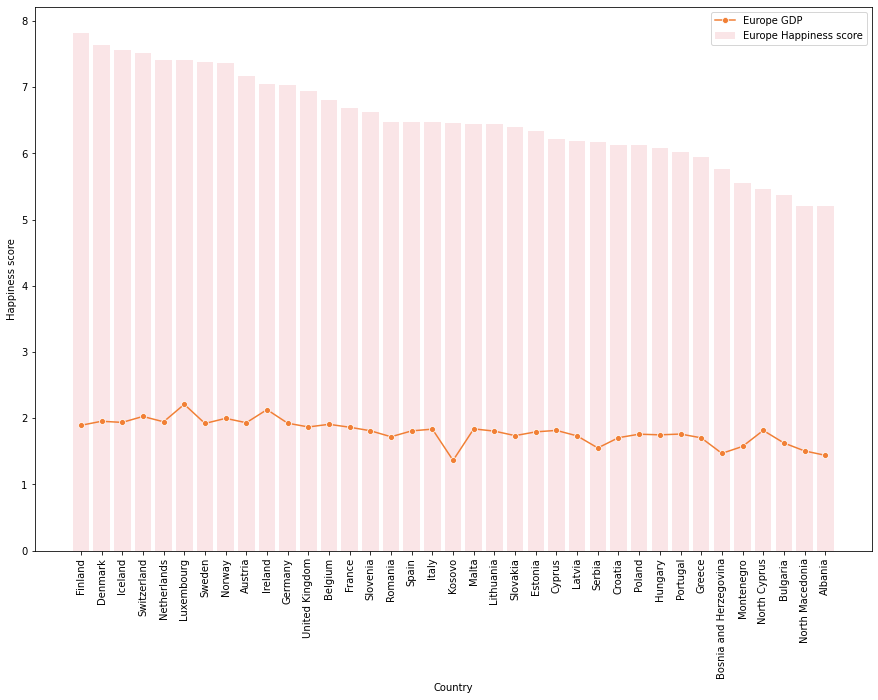

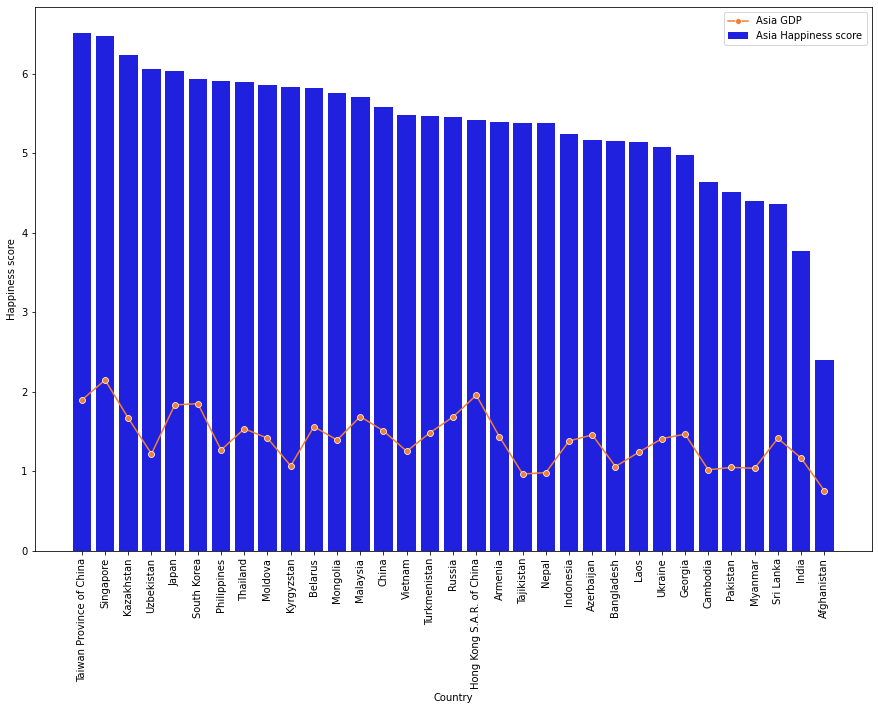

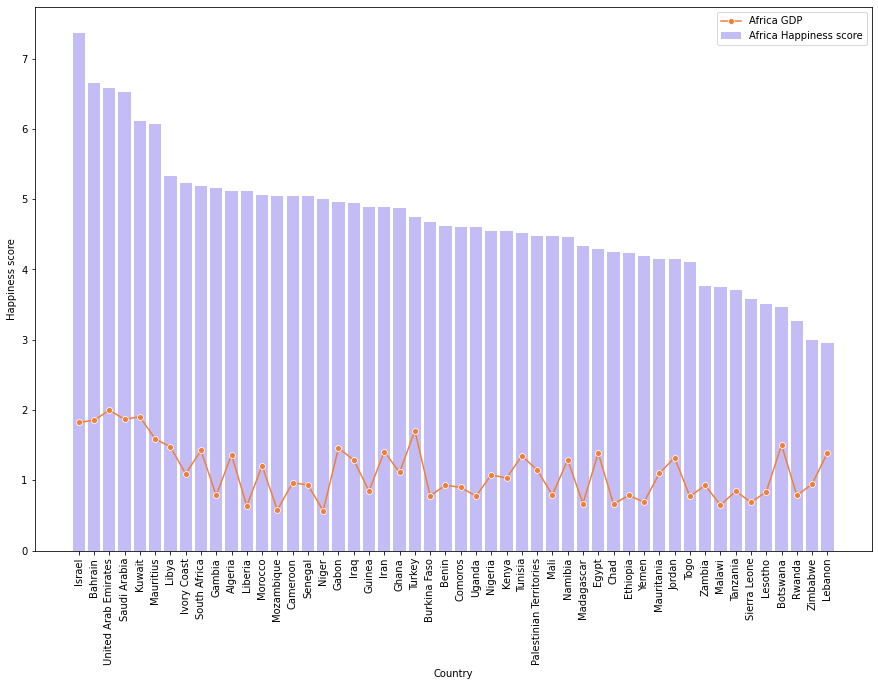

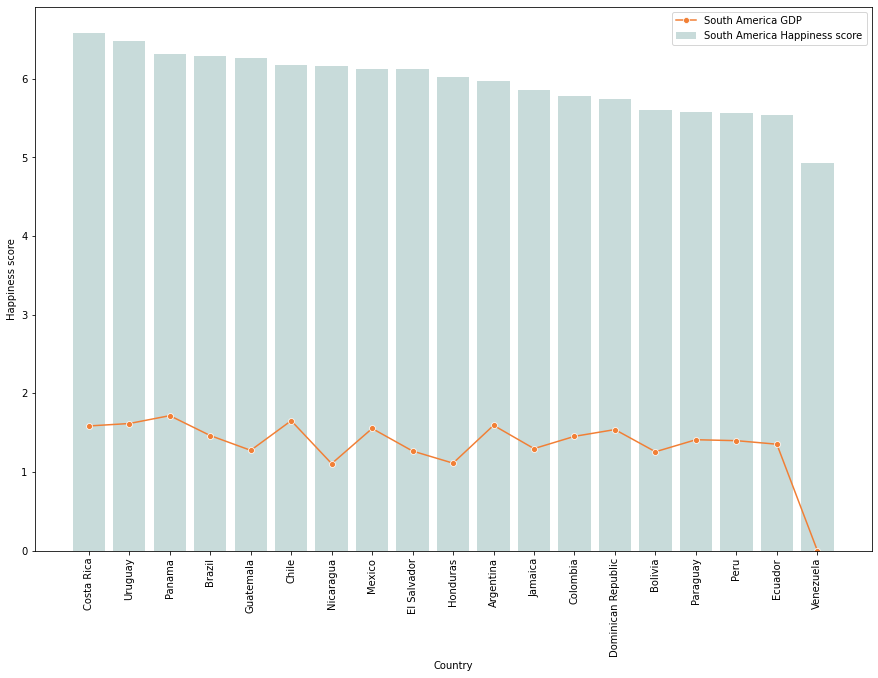

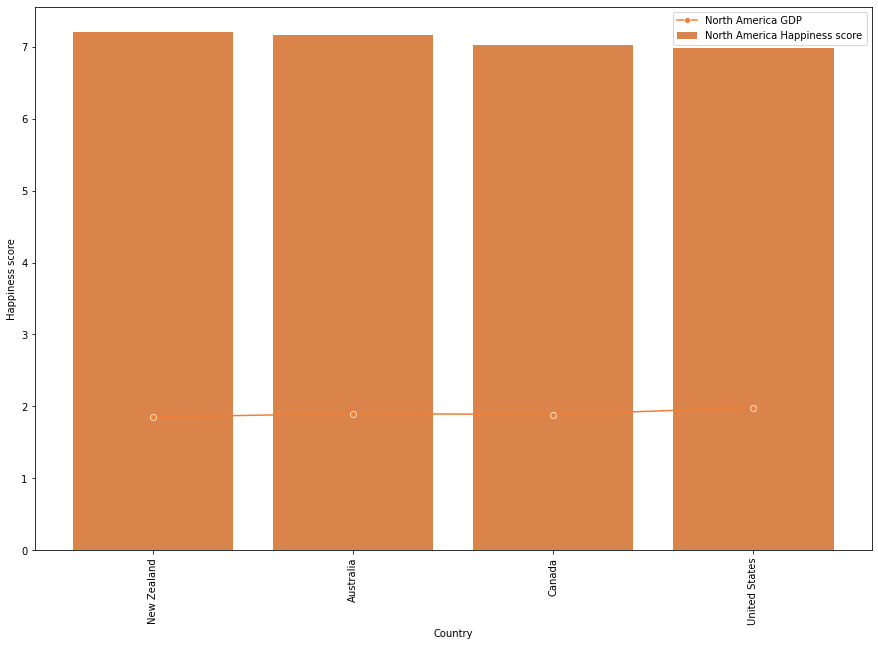

In [23]:
continents = [Europe, Asia, Africa, SouthAmerica, NorthAmerica]
colors = ['#FDE2E4', 'b', '#BDB2FF', '#C5DEDD', '#F17F35']
labels = ['Europe', 'Asia', 'Africa', 'South America', 'North America']

for i in range(len(continents)):
    plt.figure(figsize = (15, 10))
    plt.xticks(rotation = (90))
    sns.barplot(data=continents[i], x='Country', y='Happiness score', label=f'{labels[i]} Happiness score', color=colors[i])
    sns.lineplot(data=continents[i], x='Country', y='GDP', marker='o', label=f'{labels[i]} GDP', color='#F17F35');




Especifically, I want to know which countries are outliers for corruption.

## Which countries are most corrupt and what is the correlation between happpiness score and corruption?

In [25]:
from scipy.stats import chi2
from matplotlib import patches

Mahalanobis distance

Establishing covariance between 'Happiness score' and 'Perceptions of corruption' features

In [26]:
cov_df = cleaned_df[['Happiness score', 'Perceptions of corruption']]
cov_df = cov_df.to_numpy()


#calculating covariance matrix
covariance = np.cov(cov_df, rowvar=False)

#calculating covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

#Center point
centerpoint = np.mean(cov_df, axis=0)
print('centerpoint', centerpoint)

centerpoint [5.55357534 0.15478082]


In [27]:
distances = []

for i, val in enumerate(cov_df):
  p1 = val
  p2 = centerpoint
  distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
  distances.append(distance)



distances = np.array(distances)

cutoff = chi2.ppf(0.95, cov_df.shape[1])

outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ---')
print(outlierIndexes)

print('--- Obversations found as outliers ---')
print(cov_df[distances > cutoff , :])

--- Index of Outliers ---
(array([  0,   1,   3,   6,   7,   9,  26, 138, 142, 145]),)
--- Obversations found as outliers ---
[[7.821e+00 5.340e-01]
 [7.636e+00 5.320e-01]
 [7.512e+00 4.610e-01]
 [7.384e+00 5.120e-01]
 [7.365e+00 4.740e-01]
 [7.200e+00 4.830e-01]
 [6.480e+00 5.870e-01]
 [3.702e+00 2.700e-01]
 [3.268e+00 5.440e-01]
 [2.404e+00 5.000e-03]]


In [28]:
print('Outliers for correlation between Happiness score and perceptions of corruption:')
print()
for i in outlierIndexes:
  print(cleaned_df['Country'][i])

Outliers for correlation between Happiness score and perceptions of corruption:

0          Finland
1          Denmark
3      Switzerland
6           Sweden
7           Norway
9      New Zealand
26       Singapore
138       Tanzania
142         Rwanda
145    Afghanistan
Name: Country, dtype: object


In [29]:
print('The identified outliers for happiness score and perceptions of corruption correlation:')
corruption_df = cleaned_df.loc[outlierIndexes]
corruption_df

The identified outliers for happiness score and perceptions of corruption correlation:


,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Europe
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Europe
6,Sweden,7.384,1.920,1.204,0.803,0.724,0.218,0.512,Europe
7,Norway,7.365,1.997,1.239,0.786,0.728,0.217,0.474,Europe
9,New Zealand,7.200,1.852,1.235,0.752,0.680,0.245,0.483,North America
26,Singapore,6.480,2.149,1.127,0.851,0.672,0.163,0.587,Asia
138,Tanzania,3.702,0.848,0.597,0.425,0.578,0.248,0.270,Africa
142,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544,Africa
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005,Asia


From this we can see that for some reason, over 50% of the happiest nations in the world report high levels of corruption while some of the unhappiest nations in the world, Afghanistan and Tanzania report having some of the lowest perception of corruption.

Identifying the general top ten countries that perceived to have the lowest corruption rates:

In [30]:
cleaned_df.nsmallest(10, 'Perceptions of corruption', 'all')

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
46,Croatia,6.125,1.705,1.183,0.709,0.535,0.109,0.000,Europe
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005,Asia
27,Romania,6.477,1.719,1.006,0.655,0.605,0.039,0.006,Europe
66,Bosnia and Herzegovina,5.768,1.468,1.068,0.665,0.448,0.244,0.006,Europe
97,Ukraine,5.084,1.411,1.081,0.583,0.473,0.188,0.017,Asia
140,Lesotho,3.512,0.839,0.848,0.000,0.419,0.076,0.018,Africa
84,Bulgaria,5.371,1.625,1.163,0.640,0.563,0.123,0.021,Europe
34,Slovakia,6.391,1.736,1.232,0.707,0.479,0.118,0.025,Europe
63,Kyrgyzstan,5.828,1.069,1.109,0.638,0.693,0.208,0.025,Asia
60,Thailand,5.891,1.535,1.096,0.697,0.617,0.321,0.026,Asia


Identifying the countries that perceived to have the highest corruption rates:

In [31]:
cleaned_df.nlargest(10, 'Perceptions of corruption', 'all')

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
26,Singapore,6.480,2.149,1.127,0.851,0.672,0.163,0.587,Asia
142,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544,Africa
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Europe
6,Sweden,7.384,1.920,1.204,0.803,0.724,0.218,0.512,Europe
9,New Zealand,7.200,1.852,1.235,0.752,0.680,0.245,0.483,North America
7,Norway,7.365,1.997,1.239,0.786,0.728,0.217,0.474,Europe
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,Europe
12,Ireland,7.041,2.129,1.166,0.779,0.627,0.190,0.408,Europe


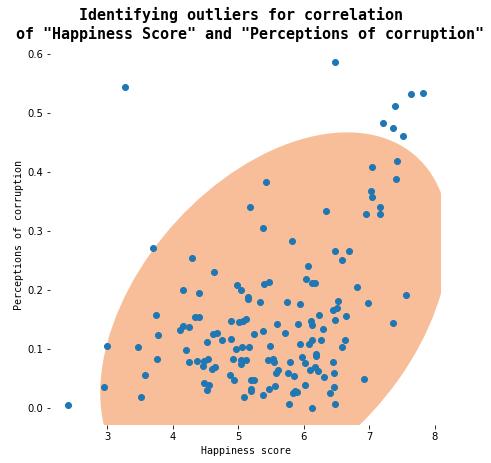

In [32]:
#Finding ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                          width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2, 
                          angle=np.rad2deg(np.arccos(v[0,0])), edgecolor='#E0288A', fill=True, linewidth=0)
ellipse.set_facecolor('#F17F35')
ellipse.set_alpha(0.5)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot()
ax.add_artist(ellipse)
ax.set_xlabel('Happiness score', fontdict={'fontfamily': 'monospace'})
ax.set_ylabel('Perceptions of corruption', fontdict={'fontfamily': 'monospace'})
ax.set_title('Identifying outliers for correlation \n of "Happiness Score" and "Perceptions of corruption"', fontdict={'fontfamily': 'monospace',
                                                                                                                       'fontsize': '15', 
                                                                                                                       'fontweight': 'bold'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.scatter(cov_df[: , 0], cov_df[ : , 1])
plt.show()

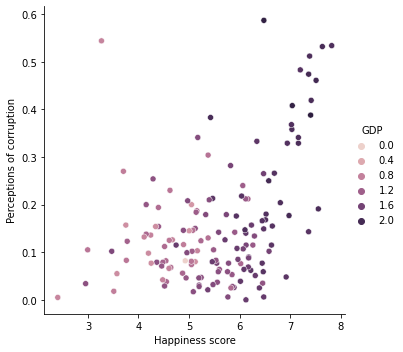

In [33]:
sns.relplot(data=cleaned_df, x=cleaned_df['Happiness score'], y=cleaned_df['Perceptions of corruption'], hue=cleaned_df['GDP'].loc[:])

Box plot to visualize the highest and lowest values for each column

Who has the highest values for perceptions of corruption?

In [34]:
corruption_df = cleaned_df[['Country', 'Perceptions of corruption', 'GDP', 'Happiness score']]
corruption_df

,Country,Perceptions of corruption,GDP,Happiness score
0,Finland,0.534,1.892,7.821
1,Denmark,0.532,1.953,7.636
2,Iceland,0.191,1.936,7.557
3,Switzerland,0.461,2.026,7.512
4,Netherlands,0.419,1.945,7.415
...,...,...,...,...
141,Botswana,0.102,1.503,3.471
142,Rwanda,0.544,0.785,3.268
143,Zimbabwe,0.105,0.947,2.995
144,Lebanon,0.034,1.392,2.955


To do:
Line graph depicting relationships 
Load other data to study happiness over the years 
Correlation types (spearman, pearson, kendall)

boxed plot 


Ideas:
1) Set continent and examine happiness across continets
4) Which country has been on a positive trajectory over the past five years
5) Which country is on the decline in terms of positivity
7) Is corruption increasing in the world?
8) Is generosity?

# Can a simple linear model predict 'Happiness score' and 'GDP'? 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = cleaned_df['Happiness score']
y = cleaned_df['GDP']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=100)

In [38]:
X_train
print(y_train)

132    1.100
99     1.208
142    0.785
90     1.425
82     0.966
       ...  
87     1.094
103    0.570
67     1.393
24     1.870
8      1.826
Name: GDP, Length: 116, dtype: float64


In [39]:
import statsmodels.api as sm

#adding a constant to get an interception
X_train_sm = sm.add_constant(X_train)

In [40]:
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const             -0.289712
Happiness score    0.303432
dtype: float64

In [41]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.64e-23
Time:                        15:58:25   Log-Likelihood:                -16.907
No. Observations:                 116   AIC:                             37.81
Df Residuals:                     114   BIC:                             43.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2897      0.138     -2.098      0.038      -0.563      -0.016
Happiness score     0.3034      0.024     12.480      0.000       0.255       0.352
==============================================================================
Omnibus:                       18.632   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.567
Skew:                          -0.628   Prob(JB):                     4.22e-09
Kurtosis:                       5.530   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

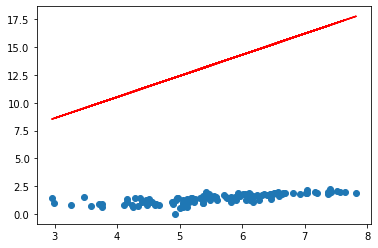

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.9078 + 1.9029 * X_train, 'r')
plt.show()

In [43]:
#Error = Actual y value - predicted y value
#Using training data to predict y value
y_train_pred = lr.predict(X_train_sm)

#Creating residuals
res = (y_train - y_train_pred)

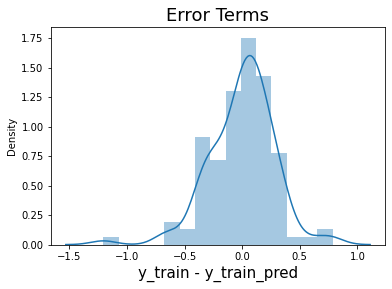

In [44]:
#Looking at distribution of residuals
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=18)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

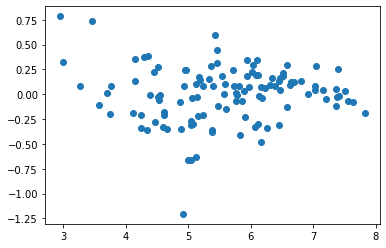

In [45]:
plt.scatter(X_train, res)
plt.show()

In [46]:
#adding constant to x_train
X_test_sm = sm.add_constant(X_test)

#predicting y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

#Printing the first 15 predicted values
y_test_pred

75     1.389179
28     1.675316
41     1.585500
46     1.568811
40     1.597940
131    0.983794
51     1.552426
121    1.070575
11     1.883470
113    1.118214
32     1.666516
26     1.676529
54     1.537557
15     1.827335
109    1.193465
145    0.439740
77     1.371277
29     1.674709
37     1.619788
111    1.149771
89     1.287833
88     1.287833
16     1.817019
135    0.856352
97     1.252938
62     1.485367
124    1.044177
73     1.397068
140    0.775942
92     1.277213
dtype: float64

In [47]:
#importing r2_square
from sklearn.metrics import r2_score

#checking the R-square value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.5991509770059811

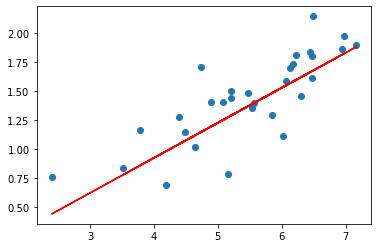

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()